In [1]:
import numpy as np
import matplotlib.pyplot as plt
from GaussianOptics import ThinLens,Gaussian_propagation2d,DrawBeamCountour
c=299792458*1000

In [2]:
'''CHAMP informations'''
freq=158.333*10**9
Lambda1=c/freq
win2=2.74925
#win2=2.2
din2=26.0865
f2=70.2857
P2=ThinLens(win2, din2, f2, Lambda1)

din1=74.501
f1=74.0689
P1=ThinLens(P2['wout'], din1, f1, Lambda1)
Ls=din1+P2['dout']
Ls=30.463

In [3]:
def p_w(dz,s):
    p2=ThinLens(win2, din2+dz, f2, Lambda1)
    p1=ThinLens(p2['wout'], Ls-p2['dout'], f1, Lambda1)
    z_c, w_z, Rin, q1, phi1, beam = Gaussian_propagation2d(p1['wout'],s-dz-p1['dout'],Lambda1)
    #print('S:',s-p1['dout'])
    power=1/w_z**2
    #print(p2['din'])
    return s-p1['dout'], p1['wout'], w_z, power

In [4]:
def scan_Rx(dz,distance=1000):
    D=np.array([])
    W_out=np.array([])
    W_s=np.array([])
    P_s=np.array([])
    for n in dz:
        d, w_out, w_s, power_s =p_w(n,distance)
        D=np.append(D,d)
        W_out=np.append(W_out,w_out)
        W_s=np.append(W_s,w_s)
        P_s=np.append(P_s,power_s)
    P_s=P_s/P_s.max()
    return D, W_out, W_s, P_s

In [5]:
z=np.linspace(-3,5,2001)
D1,W1,Ws1,Power1=scan_Rx(z)
D1_4,W1_4,Ws1_4,Power1_4=scan_Rx(z,distance=1400)
D2,W2,Ws2,Power2=scan_Rx(z,distance=2000)

[2.352]
[1.732]
[0.828]


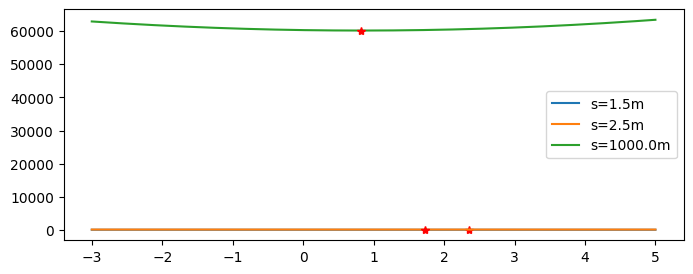

In [6]:
D_source=[1500,2500,1000000]
fig=plt.figure(figsize=(8,3))
for item in D_source:
    D,W,Ws,Ps=scan_Rx(z,distance=item)
    plt.plot(z,Ws,label='s='+str(item/1000)+'m')
    NN=np.where(Ws==Ws.min())
    print(z[NN])
    plt.plot(z[NN],Ws.min(),'r*')

plt.legend()
plt.show()

Detector distance 1.5m [2.352] [2.352]
Detector distance 2.5m [1.732] [-0.62]
Detector distance 1000.0m [0.828] [1.448]


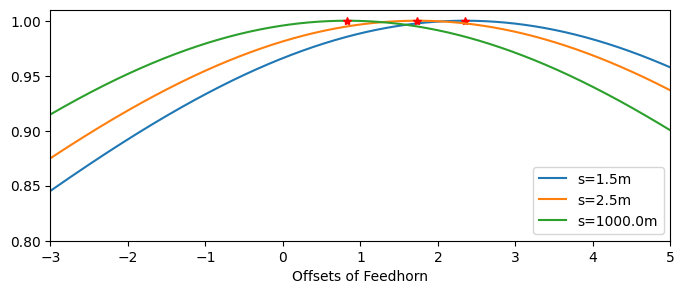

In [7]:
fig=plt.figure(figsize=(8,3))
'''Beam power in detector'''
dZ=0
for item in D_source:
    D,W,Ws,Ps=scan_Rx(z,distance=item)
    '''Beam power in detector'''
    plt.plot(z,Ps,label='s='+str(item/1000)+'m')
    NN=np.where(Ps==1.0)
    dZ=z[NN]-dZ
    print('Detector distance '+str(item/1000)+'m',z[NN],dZ)
    plt.plot(z[NN],1.0,'r*')
plt.ylim([0.8,1.01])
plt.xlim([z.min(),z.max()])
plt.legend()
plt.xlabel('Offsets of Feedhorn')
plt.show()

In [8]:
p_w(0,75.84072233947043)

(60.8410538594563, 9.999103565899567, 10.650373521622281, 0.008815974421163927)

In [9]:
P1['wout']

10.61292404498776

In [10]:
p_w(0,1000)

(985.0003315199858,
 9.999103565899567,
 60.20716870636862,
 0.0002758694383980802)

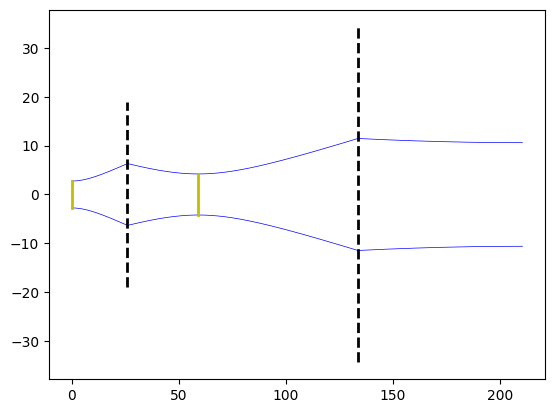

In [12]:
M2=ThinLens(win2, din2, f2, Lambda1)
DrawBeamCountour([P2,P1],Nin=301,Nout=301,size=1,offset=0)